## 8. Segy writer

In [1]:
import numpy as np
import sys
import os
import matplotlib.pyplot as plt

In [2]:
import seismo_reader as sr

### 8.1 Описание класса 

Экспорт SEG-Y в библиотеке представлен классом __sr.segy_writer__. Описание методов класса можно получить по команде help:

In [3]:
help(sr.segy_writer)

Help on class segy_writer in module seismo_reader.seismo_reader:

class segy_writer(pybind11_builtins.pybind11_object)
 |  Method resolution order:
 |      segy_writer
 |      pybind11_builtins.pybind11_object
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(...)
 |      __init__(self: seismo_reader.seismo_reader.segy_writer, arg0: seismo_reader.seismo_reader.segy_writer_config) -> None
 |  
 |  bin_header(...)
 |      bin_header(self: seismo_reader.seismo_reader.segy_writer) -> seismo_reader.seismo_reader.abstract_header
 |  
 |  close(...)
 |      close(self: seismo_reader.seismo_reader.segy_writer) -> None
 |  
 |  endian(...)
 |      endian(self: seismo_reader.seismo_reader.segy_writer) -> endian_order
 |  
 |  header_map(...)
 |      header_map(self: seismo_reader.seismo_reader.segy_writer) -> seismo_reader.seismo_reader.header_map
 |  
 |  set_bin_header(...)
 |      set_bin_header(self: seismo_reader.seismo_reader.segy_writer, arg0: seismo_reader.seismo_r

Класс позволяет записывать в SEG-Y формате трассы, поданные как по одиночке, так и массивом или в составе линии (см. segy_reader).

Так же класс позволяет устанавливать и редактировать текстовый и бинарный заголовки.

Класс __segy_writer__, как и __segy_reader__, имеет единственный конструктор с базовыми настройками, которые подаются в виде объекта класса __sr.segy_writer_config__. Описание конфигурационного класса можно так же увидеть по команде help:

In [4]:
help(sr.segy_writer_config)

Help on class segy_writer_config in module seismo_reader.seismo_reader:

class segy_writer_config(pybind11_builtins.pybind11_object)
 |  Method resolution order:
 |      segy_writer_config
 |      pybind11_builtins.pybind11_object
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(...)
 |      __init__(self: seismo_reader.seismo_reader.segy_writer_config) -> None
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  data_format
 |  
 |  filename
 |  
 |  sorting
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from pybind11_builtins.pybind11_object:
 |  
 |  __new__(*args, **kwargs) from pybind11_builtins.pybind11_type
 |      Create and return a new object.  See help(type) for accurate signature.



Класс __sr.segy_writer_config__ содержит 3 поля:
>__data_format__ - конечный формат данных трасс (по умолчанию определяется автоматически)<br>
>__filename__ - имя файла для записи<br>
>__sorting__ - конечная сортировка<br>

Формат данных задается перечислением __sr.segy_data_format__ и содержит следующие поддерживаемые форматы:

In [5]:
help(sr.segy_data_format)

Help on class segy_data_format in module seismo_reader.seismo_reader:

class segy_data_format(pybind11_builtins.pybind11_object)
 |  Members:
 |  
 |  float32
 |  
 |  float32_ibm
 |  
 |  float32_obsolete
 |  
 |  float64
 |  
 |  int16_2complement
 |  
 |  int24_2complement
 |  
 |  int32_2complement
 |  
 |  int64_2complement
 |  
 |  int8_2complement
 |  
 |  uint16
 |  
 |  uint24
 |  
 |  uint32
 |  
 |  uint64
 |  
 |  uint8
 |  
 |  automatic
 |  
 |  Method resolution order:
 |      segy_data_format
 |      pybind11_builtins.pybind11_object
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __eq__ = (...)
 |      (self: object, arg0: object) -> bool
 |  
 |  __getstate__ = (...)
 |      (self: object) -> int_
 |  
 |  __hash__ = (...)
 |      (self: object) -> int_
 |  
 |  __init__(...)
 |      __init__(self: seismo_reader.seismo_reader.segy_data_format, arg0: int) -> None
 |  
 |  __int__(...)
 |      __int__(self: seismo_reader.seismo_reader.segy_data_format) -

Сортировка возможна в трех вариантах:

In [6]:
help(sr.segy_sorting)

Help on class segy_sorting in module seismo_reader.seismo_reader:

class segy_sorting(pybind11_builtins.pybind11_object)
 |  Members:
 |  
 |  as_is
 |  
 |  crossline
 |  
 |  iline
 |  
 |  Method resolution order:
 |      segy_sorting
 |      pybind11_builtins.pybind11_object
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __eq__ = (...)
 |      (self: object, arg0: object) -> bool
 |  
 |  __getstate__ = (...)
 |      (self: object) -> int_
 |  
 |  __hash__ = (...)
 |      (self: object) -> int_
 |  
 |  __init__(...)
 |      __init__(self: seismo_reader.seismo_reader.segy_sorting, arg0: int) -> None
 |  
 |  __int__(...)
 |      __int__(self: seismo_reader.seismo_reader.segy_sorting) -> int
 |  
 |  __ne__ = (...)
 |      (self: object, arg0: object) -> bool
 |  
 |  __repr__ = (...)
 |      (self: handle) -> str
 |  
 |  __setstate__ = (...)
 |      (self: seismo_reader.seismo_reader.segy_sorting, arg0: int) -> None
 |  
 |  --------------------------------------

где
>__as_is__ - (default) означает запись трасс в том порядке, в котором они подаются<br>
>__iline__ - форсированная сортировка по iline номеру<br>
>__crossline__ - форсированная сортировка по crossline номеру<br>

### 8.2 Простая перезапись 

Рассмотрим функционал класса __sr.segy_writer__ на примере простой перезаписи 2D файла.

Для этого прочитаем из файла 2D.segy все трассы и перезапишем его в файл 2D-out.segy.

In [7]:
reader_config = sr.reader_config()
reader_config.filename = '2D.segy'
reader = sr.segy_reader(reader_config)

In [8]:
reader.preprocessing()

In [9]:
g = reader.geometry()
line = reader.traces(g.lines()[0])

Визуализируем прочиланную линюю:

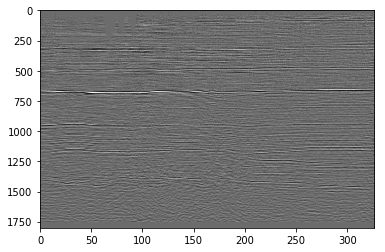

In [10]:
trc_array = np.zeros((len(line), reader.samples_count()))
for i in range(0, len(line)):
    trc_array[i, :] = line[i].data()

plt.imshow(trc_array.T, cmap='gray_r', aspect='auto')
plt.show()

Перейдем непосредственно к записи.

In [11]:
writer_config = sr.segy_writer_config()
writer_config.filename = '2D-out.segy'

In [12]:
writer = sr.segy_writer(writer_config)

Так как мы загрузили линию, будем использовать метод __write_line__:

In [13]:
writer.write_line(g.lines()[0], line)

__После окончания записи требуется вызвать метод _close_, без этого действия файл будет открыт для записи и не будет содержать текстовый и бинарный заголовки, так как эта информация записывается после обработки всех трасс.__

In [14]:
writer.close()

Откроем полученный файл 2D-out.segy при помощи segy_reader и посмотрим на записанную в нем информацию.

Начнем с визуализации записанной в нем линии.

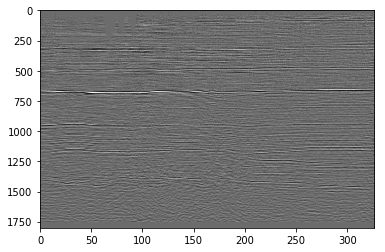

In [15]:
reader_config = sr.reader_config()
reader_config.filename = '2D-out.segy'
reader = sr.segy_reader(reader_config)

reader.preprocessing()
g = reader.geometry()
line = reader.traces(g.lines()[0])

trc_array = np.zeros((len(line), reader.samples_count()))
for i in range(0, len(line)):
    trc_array[i, :] = line[i].data()

plt.imshow(trc_array.T, cmap='gray_r', aspect='auto')
plt.show()

С виду сейсмическая линия, хранящаяся в файле 2D.segy, совпала с той, что мы записали в 2D-out.segy. Посмотрим на заголовки:

In [16]:
reader.text_header().to_dict()

{'C 1': 'SEG-Y OUTPUT FROM seismo_reader library, Wed Jul 29 05:29:48 2020           ',
 'C 2': 'NAME: <und>     Type: <und>                                                 ',
 'C 3': '                                                                            ',
 'C 4': 'Additional text headers count:  0                                           ',
 'C 5': '                                                                            ',
 'C 6': 'AREA INFO                                                                   ',
 'C 7': 'First CDP:  0,  Last CDP:   0                                               ',
 'C 8': 'X min:      123207,     X max:      132229,     Delta:  9022                ',
 'C 9': 'Y min:      1.1191e+06,     Y max:      1.13262e+06,    Delta:  13521       ',
 'C10': 'Time min:   43,     Time max:   -3485,  Delta:  -3528                       ',
 'C11': 'Lat min:    <und>,   Lat max:    <und>,   Delta:  <und>                     ',
 'C12': 'Long min:   <und>,  Lon

Текстовый заголовок файла 2D-out.segy дейтвительно говорит о том, что файл записан при помощи библиотеки seismo_reader. Так же содержит основную информацию о том, как правильно прочитать файл.

In [17]:
reader.bin_header().to_dict()

{'Amplitude rec method': 0,
 'Aux traces count': 0,
 'Correlated traces': 0,
 'Data format': 3,
 'Endian': 1,
 'Ensemble fold': 0,
 'Extended aux traces count': 0,
 'Extended ensemble fold': 0,
 'Extended sample interval': 0.0,
 'Extended sample interval orig': 0.0,
 'Extended samples count': 0,
 'Extended samples count orig': 0,
 'Extended text headers count': 0,
 'Extended traces count': 0,
 'First trace offset': 0,
 'Gain recovered': 0,
 'Is same for file': 0,
 'Is segy 2': 0,
 'Job id': 0,
 'Line num': 0,
 'Max add trc headers count': 0,
 'Measurement system': 0,
 'Polarity code': 0,
 'Reel num': 0,
 'Sample interval': 2000.0,
 'Sample interval orig': 0.0,
 'Samples count': 1801,
 'Samples count orig': 0,
 'Signal polarity': 0,
 'Sorting code': 0,
 'Stream traces count': 0,
 'Sweep chanel trcs count': 0,
 'Sweep fr end': 0,
 'Sweep fr start': 0,
 'Sweep len': 0,
 'Sweep trc taper len end': 0,
 'Sweep trc taper len start': 0,
 'Sweep type': 0,
 'Taper type': 0,
 'Time basis': 0,
 'T

Бинарный заголовок содержит минимум ненулевой информации, несмотря на то, что бинарный заголовок 2D.segy был более информативным:
>Data format<br>
>Endian<br>
>Samples count<br>
>Sample interval<br>

Так же можно заметить одну особенность. Формат данных стоит 3, несмотря на то, что в исходном файле был форма 8. __Дело в том, что применение автоматического формата данных гарантирует отсутствие потерь в данных, но не гарантирует полного совпадения форматов.__ Таким образом, файл 2D.segy из формата __8-bit two's complemented integer__ был перезаписан в формате __16-bit two's complemented integer__.

Это доказывает и размер получившегося файла.

In [18]:
os.stat('2D.segy').st_size

671007

In [19]:
os.stat('2D-out.segy').st_size

1259934

In [20]:
os.stat('2D-out.segy').st_size / os.stat('2D.segy').st_size

1.8776763878767286

Действительно, размер файла почти в 2 раза больше (как и формат 16-bit integer в 2 раза объемнее формата 8-bit integer).

Удалим файл 2D-out.segy и запишем его заново при помощи функции __write_traces__:

In [21]:
reader.close()
os.remove('2D-out.segy')

In [22]:
reader_config = sr.reader_config()
reader_config.filename = '2D.segy'
reader = sr.segy_reader(reader_config)

reader.preprocessing()
g = reader.geometry()
line = reader.traces(g.lines()[0])

In [23]:
writer = sr.segy_writer(writer_config)
writer.write_traces(line)
writer.close()

Проверим записанную линию:

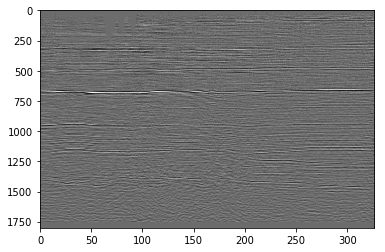

In [24]:
reader_config = sr.reader_config()
reader_config.filename = '2D-out.segy'
reader = sr.segy_reader(reader_config)

reader.preprocessing()
g = reader.geometry()
line = reader.traces(g.lines()[0])

trc_array = np.zeros((len(line), reader.samples_count()))
for i in range(0, len(line)):
    trc_array[i, :] = line[i].data()

plt.imshow(trc_array.T, cmap='gray_r', aspect='auto')
plt.show()

Все в порядке. Аналогично за записью трасс по одиночке при помощи метода __write_trace__.

### 8.3 Перезапись с другим форматом данных

Для перезаписи с другим форматом данных достаточно установить поле __sr.segy_writer_config.data_format__ на необходимый формат.

Удалим файл 2D-out.segy и перезапишем его в формате __IBM float 32-bit__:

In [25]:
reader.close()
os.remove('2D-out.segy')

In [26]:
writer_config.data_format = sr.segy_data_format.float32_ibm

writer = sr.segy_writer(writer_config)
writer.write_traces(line)
writer.close()

In [27]:
writer.write_traces(line)
writer.close()

Теперь формат в бинарном заголовке изменился:

In [28]:
reader_config = sr.reader_config()
reader_config.filename = '2D-out.segy'
reader = sr.segy_reader(reader_config)

In [29]:
reader.bin_header().get('Data format')

1

А файл стал примерно в 4 раза больше:

In [30]:
os.stat('2D-out.segy').st_size / os.stat('2D.segy').st_size

3.6330291636301855

### 8.4 Смена порядка байт 

По умолчанию segy_writer выставляет нативный порядок байт (little для большинства операционных систем), однако можно самостоятельно установить порядок big (например, если файл будет далее использоваться на кластерах IBM).

Для этого segy_writer предоставляет функции __endian/set_endian__.

In [31]:
writer_config.data_format = sr.segy_data_format.automatic

writer = sr.segy_writer(writer_config)

Нативный порядок байт в системе:

In [32]:
writer.endian()

endian_order.little

Сменим на big:

In [33]:
writer.set_endian(sr.endian_order.big)

Запишем трассы, прочитаем и убедимся, что все в порядке.

In [34]:
reader_config = sr.reader_config()
reader_config.filename = '2D.segy'
reader = sr.segy_reader(reader_config)

reader.preprocessing()
g = reader.geometry()
line = reader.traces(g.lines()[0])

In [35]:
writer.write_traces(line)
writer.close()

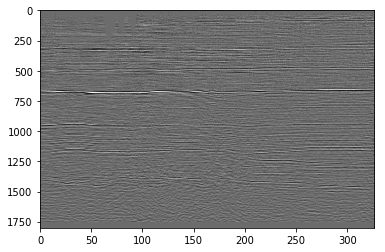

In [36]:
reader_config = sr.reader_config()
reader_config.filename = '2D-out.segy'
reader = sr.segy_reader(reader_config)

reader.preprocessing()
g = reader.geometry()
line = reader.traces(g.lines()[0])

trc_array = np.zeros((len(line), reader.samples_count()))
for i in range(0, len(line)):
    trc_array[i, :] = line[i].data()

plt.imshow(trc_array.T, cmap='gray_r', aspect='auto')
plt.show()

Картинка в порядке, а в бинарном заголовке вместо 1, как было до этого, стоит 0:

In [37]:
reader.bin_header().get('Endian')

0

Для интерпретации сейсмических данных рекомендуется использовать little endian, так как в основном интерпретация происходит на ПК, а большинство ПК работают в порядке байт little.

### 8.5 Редактирование заголовков 

Удалим полученный файл и перезапишем его с изменением текстового и бинарного заголовков.

In [38]:
reader.close()
os.remove('2D-out.segy')

Создадим пустой объект __segy_writer__ и посмотрим на его заголовки:

In [39]:
writer = sr.segy_writer(writer_config)

In [40]:
wth = writer.text_header()

In [41]:
wth.to_dict()

{'C 1': 'SEG-Y OUTPUT FROM %ProductName, %DateTime',
 'C 2': 'NAME: %name\tType: %type',
 'C 3': '',
 'C 4': 'Additional text headers count:\t%add_text_headers_count',
 'C 5': '',
 'C 6': 'AREA INFO',
 'C 7': 'First CDP:\t%first_cdp,\tLast CDP:\t%last_cdp',
 'C 8': 'X min:\t\t%x_min,\tX max:\t\t%x_max,\tDelta:\t%x_delta',
 'C 9': 'Y min:\t\t%y_min,\tY max:\t\t%y_max,\tDelta:\t%y_delta',
 'C10': 'Time min:\t%time_min,\tTime max:\t%time_max,\tDelta:\t%time_delta',
 'C11': 'Lat min:\t%lat_min,\tLat max:\t%lat_max,\tDelta:\t%lat_delta',
 'C12': 'Long min:\t%long_min,\tLong max:\t%long_max,\tDelta:\t%long_delta',
 'C13': 'Trace min:\t%trace_min,\tTrace max:\t%trace_max,\tDelta:\t%trace_delta',
 'C14': '',
 'C15': 'BINARY HEADER INFO',
 'C16': 'Location:\t\t\t\t\t\t%bin_header_loc',
 'C17': 'Sample interval:\t\t\t\t%bin_header_sample_interval_loc',
 'C18': 'Number of samples per trace:\t%bin_header_samples_count_loc',
 'C19': 'Trace data format:\t\t\t\t%bin_header_data_format_loc',
 'C20': '

Текстовый заголовок состоит из некоторого шаблона с паттернами для замены. При этом рекомендуется заменять только поля __%ProductName__, __%name__ и __%type__. Для этого у класса __sr.text_header__ существуют специальные методы:
>set_product_name<br>
>set_object_name<br>
>set_seismic_type<br>.

Остальные паттерны будут выставлены после записи всех трасс по команде __segy_writer.close()__. Но, если сильно хочется, то можно поменять их самостоятельно.

Класс __segy_writer__ не требует обязательного "ресета", можно изменять текстовый и бинарный заголовок по ссылке, но и методы __set_text_header__ и __set_bin_header__ так же присутствуют (на всякий случай).

Сменим __%ProductName__, __%name__ и __%type__, а так же полностью заменим поле C32.

In [42]:
wth.set_product_name('GEOSIM 1.0')

In [43]:
wth.set_object_name('2D-out')

In [44]:
wth.set_seismic_type('2D')

In [45]:
wth.set('C32', 'AAAAAAAAAAAAAABBBBBBBBBBBBBBBBCCCCCCCCCCCCCCDDDDDDDDDDDDDDD')

Теперь рассмотрим содержимое бинарного заголовка:

In [46]:
wbh = writer.bin_header()

In [47]:
wbh.to_dict()

{'Amplitude rec method': 0,
 'Aux traces count': 0,
 'Correlated traces': 0,
 'Data format': 0,
 'Endian': 0,
 'Ensemble fold': 0,
 'Extended aux traces count': 0,
 'Extended ensemble fold': 0,
 'Extended sample interval': 0.0,
 'Extended sample interval orig': 0.0,
 'Extended samples count': 0,
 'Extended samples count orig': 0,
 'Extended text headers count': 0,
 'Extended traces count': 0,
 'First trace offset': 0,
 'Gain recovered': 0,
 'Is same for file': 0,
 'Is segy 2': 0,
 'Job id': 0,
 'Line num': 0,
 'Max add trc headers count': 0,
 'Measurement system': 0,
 'Polarity code': 0,
 'Reel num': 0,
 'Sample interval': 0.0,
 'Sample interval orig': 0.0,
 'Samples count': 0,
 'Samples count orig': 0,
 'Signal polarity': 0,
 'Sorting code': 0,
 'Stream traces count': 0,
 'Sweep chanel trcs count': 0,
 'Sweep fr end': 0,
 'Sweep fr start': 0,
 'Sweep len': 0,
 'Sweep trc taper len end': 0,
 'Sweep trc taper len start': 0,
 'Sweep type': 0,
 'Taper type': 0,
 'Time basis': 0,
 'Traces 

Бинарный заголовок пустой и не содержит никакого шаблона. После записи трасс в бинарном заголовке изменятся лишь поля
>Data format<br>
>Endian<br>
>Sample interval<br>
>Samples count<br>

Все остальные поля необходимо задавать самостоятельно (или не задавать вовсе).

Установим бинарный заголовок из файла 2D.segy. Для этого предоставляется метод __segy_writer.set_bin_header__.

In [48]:
reader_config = sr.reader_config()
reader_config.filename = '2D.segy'
reader = sr.segy_reader(reader_config)

In [49]:
writer.set_bin_header(reader.bin_header())

Но! Не смотря на установленный заполненный бинарный заголовок, поля __Data format__, __Endian__, __Sample interval__ и __Samples count__ будут перезаписаны по команде __segy_writer.close()__.

Запишем трассы, откроем полученный файл и посмотрим на заголовки.

In [50]:
reader.preprocessing()
g = reader.geometry()
line = reader.traces(g.lines()[0])

In [51]:
writer.write_traces(line)
writer.close()

In [52]:
reader_config = sr.reader_config()
reader_config.filename = '2D-out.segy'
reader = sr.segy_reader(reader_config)

In [53]:
reader.text_header().to_dict()

{'C 1': 'SEG-Y OUTPUT FROM GEOSIM 1.0, Wed Jul 29 05:30:32 2020                      ',
 'C 2': 'NAME: 2D-out    Type: 2D                                                    ',
 'C 3': '                                                                            ',
 'C 4': 'Additional text headers count:  0                                           ',
 'C 5': '                                                                            ',
 'C 6': 'AREA INFO                                                                   ',
 'C 7': 'First CDP:  0,  Last CDP:   0                                               ',
 'C 8': 'X min:      123207,     X max:      132229,     Delta:  9022                ',
 'C 9': 'Y min:      1.1191e+06,     Y max:      1.13262e+06,    Delta:  13521       ',
 'C10': 'Time min:   43,     Time max:   -3485,  Delta:  -3528                       ',
 'C11': 'Lat min:    <und>,   Lat max:    <und>,   Delta:  <und>                     ',
 'C12': 'Long min:   <und>,  Lon

Текстовый заголовок в точности такой, как мы и хотели.

In [54]:
reader.bin_header().to_dict()

{'Amplitude rec method': 0,
 'Aux traces count': 0,
 'Correlated traces': 0,
 'Data format': 3,
 'Endian': 1,
 'Ensemble fold': 1,
 'Extended aux traces count': 0,
 'Extended ensemble fold': 0,
 'Extended sample interval': 0.0,
 'Extended sample interval orig': 0.0,
 'Extended samples count': 0,
 'Extended samples count orig': 0,
 'Extended text headers count': 0,
 'Extended traces count': 0,
 'First trace offset': 0,
 'Gain recovered': 0,
 'Is same for file': 0,
 'Is segy 2': 0,
 'Job id': 1,
 'Line num': 1,
 'Max add trc headers count': 0,
 'Measurement system': 1,
 'Polarity code': 0,
 'Reel num': 1,
 'Sample interval': 2000.0,
 'Sample interval orig': 0.0,
 'Samples count': 1801,
 'Samples count orig': 0,
 'Signal polarity': 1,
 'Sorting code': 4,
 'Stream traces count': 0,
 'Sweep chanel trcs count': 0,
 'Sweep fr end': 0,
 'Sweep fr start': 0,
 'Sweep len': 0,
 'Sweep trc taper len end': 0,
 'Sweep trc taper len start': 0,
 'Sweep type': 0,
 'Taper type': 0,
 'Time basis': 0,
 'T

Бинарный заголовок так же содержит ненулевые поля кроме основных. Эти поля скопированны из бинарного заголовка файла 2D.segy.

__Примечание: автоматические определение типа сейсмических данных пока недоступно, поэтому устанавливать тип сейсмики необходимо самостоятельно.__

### 8.6 Trace header mapping

До этого момента ни слово не было сказано про trace header mapping, хотя в классе __segy_reader__ это было ключевым моментом, без которого невозможно считывать различные файлы в формате SEG-Y.

В классе __segy_reader__ по умолчанию используется __стандартный маппинг__, описанный в SEG Technical Standards Committee SEG-Y revision 2.0 Data Exchange format (https://seg.org/Portals/0/SEG/News%20and%20Resources/Technical%20Standards/seg_y_rev2_0-mar2017.pdf). Не зависимо от того, с каким маппингом в __segy_reader__ подаются сейсмические трассы, их заголовки преобразовываются к стандартному маппингу. Действительно, зачем что-то придумывать, когда есть стандарт?

Рассмотрим на примере. Откроем файл 2D-segy и посмотрим на информацию о маппинге в его текстовом заголовке.

In [55]:
reader_config = sr.reader_config()
reader_config.filename = '2D.segy'
reader = sr.segy_reader(reader_config)

In [56]:
reader.text_header().get('C24')

'Inline number               : bytes 5-8                                     '

Видим, что файл 2D.segy записан с нестандартным маппингом, в котором номер iline записан в заголовке трасс на позиции 17-18 байт.

Теперь откроем записанный ранее файл 2D-out.segy и получим поле С23:

In [57]:
reader_config = sr.reader_config()
reader_config.filename = '2D-out.segy'
reader = sr.segy_reader(reader_config)

In [58]:
reader.text_header().get('C23')

'Inline number:                  bytes 189-192                               '

Видим, что номер iline находится на позиции 189-192 байт, что соответствует стандарту.

Но, если сильно необходимо, __segy_writer__ позволяет сменить маппинг при помощи функции __set_header_map__.

Пример в разработке!

In [59]:
reader.close()
os.remove('2D-out.segy')

### 8.7 Смена сортировки файла

В разработке!

### 8.8 Обработка битых трасс

В разработке!

### 8.9 Обработка ошибок

В разработке!


### 8.10 Более сложный пример с 3D файлом

В разработке!


### 8.11 Заключение

In [60]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://i.ibb.co/rHkXmRz/photo-2020-07-20-20-19-42.jpg")